In [0]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
import numpy as np

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
y_train = y_train.reshape(-1,1)

In [80]:
y_train.shape

(60000, 1)

In [81]:
x_train.shape

(60000, 28, 28)

In [0]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(256,activation='relu'),
        keras.layers.Dense(128,activation='relu'),
        keras.layers.Dense(10,activation='softmax')                     
])

In [83]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_24 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_25 (Dense)             (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [85]:
history = model.fit(x=x_train,
                    y=y_train,
                    epochs=5,
                    validation_data=(x_test, y_test),
                    verbose=1
                    )

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6571 - acc: 0.8899 - val_loss: 0.3181 - val_acc: 0.9274
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2395 - acc: 0.9405 - val_loss: 0.2292 - val_acc: 0.9362
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1769 - acc: 0.9520 - val_loss: 0.1681 - val_acc: 0.9549
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1528 - acc: 0.9578 - val_loss: 0.2051 - val_acc: 0.9509
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1314 - acc: 0.9643 - val_loss: 0.1298 - val_acc: 0.9650


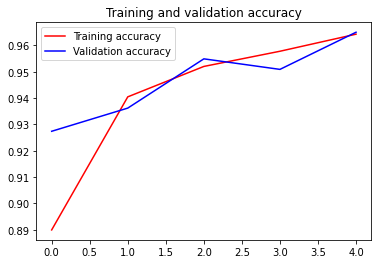

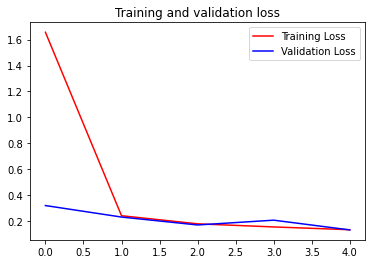

In [89]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()